Dataset loaded successfully:
   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  Satisfacti

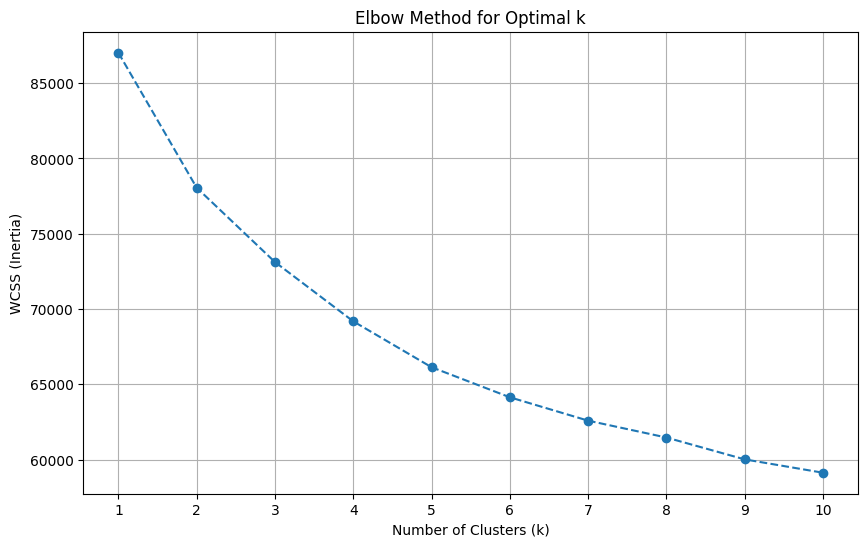

Examine the plot above. The 'elbow' point is a good candidate for k.
This is where the rate of decrease in WCSS sharply changes.

Applying K-Means Clustering with k=4...

K-Means clustering complete. Customers assigned to 4 clusters.
   Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0     4.0         Mobile Phone         3              6.0   
1     NaN                Phone         1              8.0   
2     NaN                Phone         1             30.0   
3     0.0                Phone         3             15.0   
4     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                  

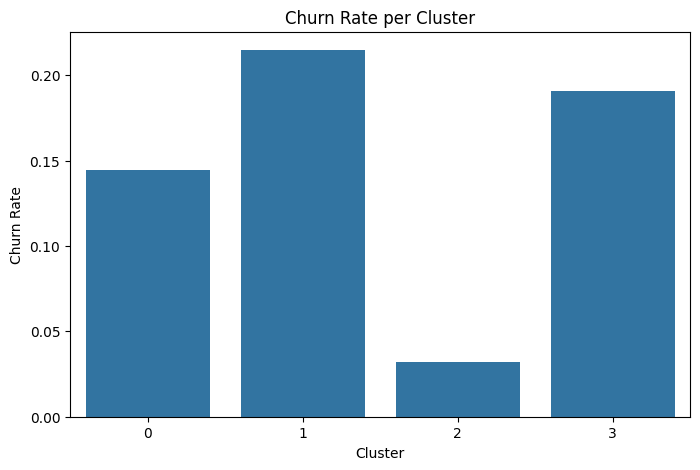

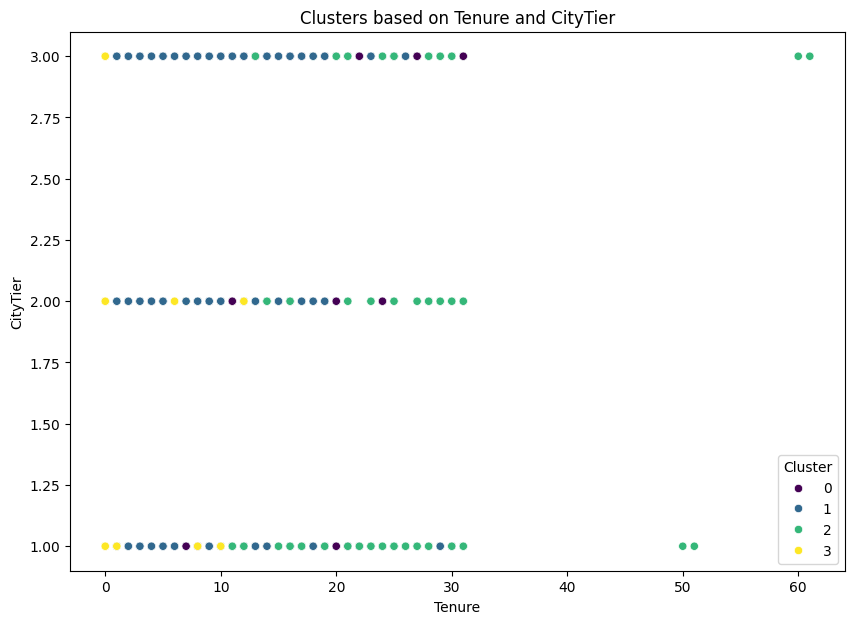

/var/folders/kw/rtpfp9xx5vj8h1n_95hjltnm0000gn/T/ipykernel_81902/3570794505.py:183: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df_clustered_analysis, palette='viridis')


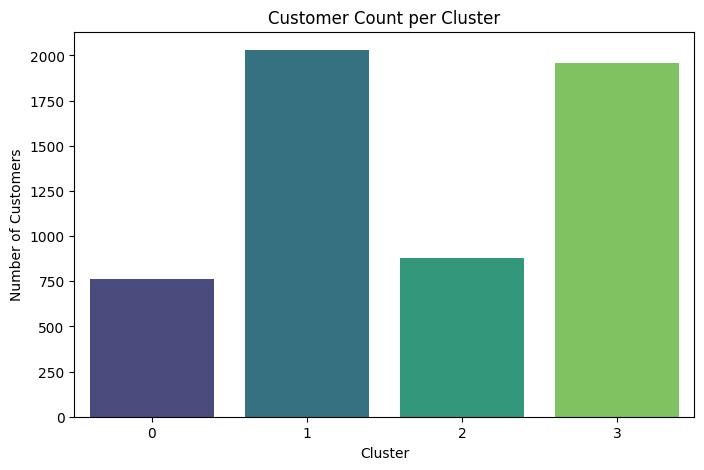


Applying PCA for 2D visualization of clusters...


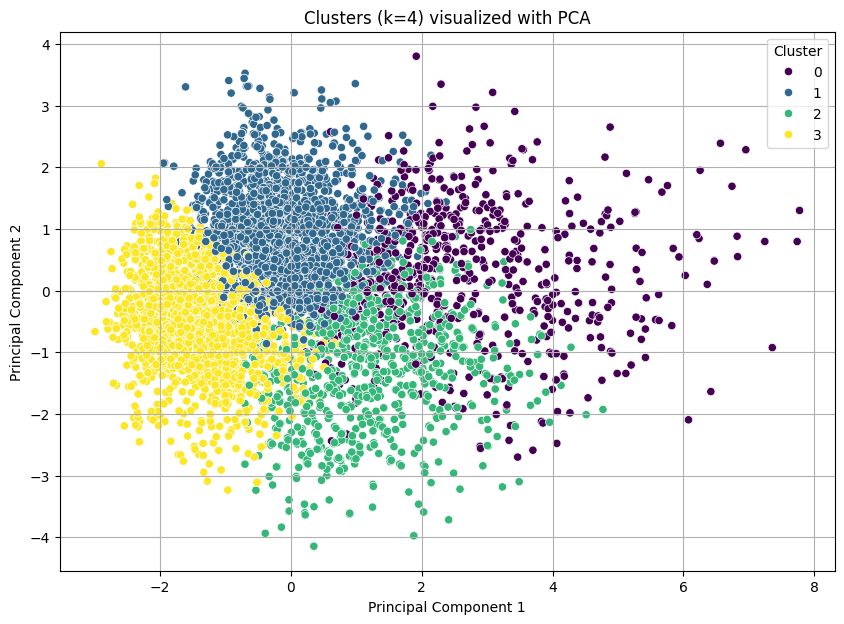

In [1]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Cell 2: Load the dataset
# Make sure to replace 'ECommerce_Churn_Data.csv' with the actual path/name of your dataset file if it's different.
try:
    df = pd.read_csv('ECommerce_Churn_Data.csv')
except FileNotFoundError:
    print("Error: The dataset file 'ECommerce_Churn_Data.csv' was not found.")
    print("Please download the dataset from https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction?resource=download")
    print("and place it in the correct directory or update the file path.")
    df = pd.DataFrame() # Create an empty DataFrame to avoid NameError

if not df.empty:
    print("Dataset loaded successfully:")
    print(df.head())
    print("\nDataset Info:")
    df.info()
    print("\nDataset Description:")
    print(df.describe(include='all'))

# Cell 3: Data Preprocessing for Clustering (if dataset loaded)
if not df.empty:
    # Make a copy for clustering, keeping original df if needed for churn analysis later
    df_cluster = df.copy()

    # Display column names
    print("\nColumn Names:")
    print(df_cluster.columns)

    # Handle 'Churn' column - we will exclude it from features for clustering,
    # but we can use it later to analyze clusters.
    # We will also drop CustomerID as it's an identifier.
    churn_data = None
    if 'Churn' in df_cluster.columns:
        churn_data = df_cluster['Churn'] # Save churn data for later analysis
        df_cluster = df_cluster.drop('Churn', axis=1)
        print("\n'Churn' column separated for later analysis.")

    if 'CustomerID' in df_cluster.columns:
        df_cluster = df_cluster.drop('CustomerID', axis=1)
        print("Dropped 'CustomerID' column.")

    # Identify categorical and numerical features
    categorical_features = df_cluster.select_dtypes(include=['object', 'category']).columns.tolist()
    numerical_features = df_cluster.select_dtypes(include=[np.number]).columns.tolist()

    print("\nCategorical Features for clustering:", categorical_features)
    print("Numerical Features for clustering:", numerical_features)

    # Create preprocessing pipelines for numerical and categorical features
    # Numerical features: Impute missing values with median, then scale
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    # Categorical features: Impute missing values with most frequent, then one-hot encode
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
    ])

    # Create a preprocessor object using ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='passthrough'
    )

    # Preprocess the data
    print("\nPreprocessing the data for clustering...")
    X_processed = preprocessor.fit_transform(df_cluster)
    print("Data preprocessing complete.")
    print("Shape of processed data:", X_processed.shape)
    
    # If X_processed is a sparse matrix, convert to dense for K-Means if memory allows or if required by some K-Means implementations
    # For scikit-learn's KMeans, it can often handle sparse matrices efficiently.
    # If you encounter issues or for smaller datasets, you can convert:
    # if hasattr(X_processed, "toarray"):
    #     X_processed = X_processed.toarray()

# Cell 4: Determine the Optimal Number of Clusters (Elbow Method) (if X_processed exists)
if 'X_processed' in locals() and X_processed.shape[0] > 10 : # Ensure there's data to process
    print("\nDetermining optimal number of clusters using the Elbow Method...")
    wcss = [] # Within-cluster sum of squares
    k_range = range(1, 11) # Test k from 1 to 10

    for k_val in k_range:
        kmeans = KMeans(n_clusters=k_val, init='k-means++', random_state=42, n_init=10)
        kmeans.fit(X_processed)
        wcss.append(kmeans.inertia_)

    # Plot the Elbow Method graph
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, wcss, marker='o', linestyle='--')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS (Inertia)')
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()
    print("Examine the plot above. The 'elbow' point is a good candidate for k.")
    print("This is where the rate of decrease in WCSS sharply changes.")

# Cell 5: Apply K-Means Clustering with Chosen k (if X_processed exists)
if 'X_processed' in locals() and X_processed.shape[0] > 10:
    # Based on the elbow plot, choose a value for k.
    # Let's assume k=4 for this example. You should adjust this based on your elbow plot.
    chosen_k = 4 # <<< CHANGE THIS BASED ON YOUR ELBOW PLOT
    print(f"\nApplying K-Means Clustering with k={chosen_k}...")

    kmeans_model = KMeans(n_clusters=chosen_k, init='k-means++', random_state=42, n_init=10)
    cluster_labels = kmeans_model.fit_predict(X_processed)

    # Add cluster labels back to the (a copy of) original dataframe (or the one used for clustering features)
    df_clustered_analysis = df_cluster.copy() # Use the df that had features for clustering
    df_clustered_analysis['Cluster'] = cluster_labels
    
    # If you separated churn_data earlier, add it back for analysis
    if churn_data is not None and len(churn_data) == len(df_clustered_analysis):
        df_clustered_analysis['Churn'] = churn_data

    print(f"\nK-Means clustering complete. Customers assigned to {chosen_k} clusters.")
    print(df_clustered_analysis.head())

# Cell 6: Analyze and Visualize Clusters (if df_clustered_analysis exists)
if 'df_clustered_analysis' in locals():
    print("\nCluster Analysis:")

    # Numerical feature analysis by cluster
    print("\n--- Mean of Numerical Features per Cluster ---")
    numerical_cluster_analysis = df_clustered_analysis.groupby('Cluster')[numerical_features].mean()
    print(numerical_cluster_analysis)

    # Categorical feature analysis by cluster (showing mode)
    print("\n--- Mode of Categorical Features per Cluster ---")
    # For a more detailed view, you might want to look at value_counts per cluster
    categorical_cluster_analysis = df_clustered_analysis.groupby('Cluster')[categorical_features].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'N/A')
    print(categorical_cluster_analysis)

    # Churn rate per cluster (if 'Churn' column is available)
    if 'Churn' in df_clustered_analysis.columns:
        print("\n--- Churn Rate per Cluster ---")
        churn_analysis = df_clustered_analysis.groupby('Cluster')['Churn'].agg(['mean', 'count'])
        churn_analysis.rename(columns={'mean': 'Churn Rate', 'count': 'Cluster Size'}, inplace=True)
        print(churn_analysis)

        # Plot churn rate per cluster
        plt.figure(figsize=(8, 5))
        sns.barplot(x=churn_analysis.index, y='Churn Rate', data=churn_analysis)
        plt.title('Churn Rate per Cluster')
        plt.ylabel('Churn Rate')
        plt.xlabel('Cluster')
        plt.show()

    # Example: Visualize a couple of numerical features by cluster
    if len(numerical_features) >= 2:
        plt.figure(figsize=(10, 7))
        sns.scatterplot(x=numerical_features[0], y=numerical_features[1], hue='Cluster', 
                        data=df_clustered_analysis, palette='viridis', legend='full')
        plt.title(f'Clusters based on {numerical_features[0]} and {numerical_features[1]}')
        plt.show()
    elif len(numerical_features) == 1:
         plt.figure(figsize=(10, 7))
         sns.stripplot(x='Cluster', y=numerical_features[0], data=df_clustered_analysis, palette='viridis')
         plt.title(f'Distribution of {numerical_features[0]} by Cluster')
         plt.show()


    # Count plot for clusters
    plt.figure(figsize=(8,5))
    sns.countplot(x='Cluster', data=df_clustered_analysis, palette='viridis')
    plt.title('Customer Count per Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Customers')
    plt.show()

# Cell 7: (Optional) PCA for 2D Visualization of Clusters
# This is useful if you have many features and want a single plot showing cluster separation.
if 'X_processed' in locals() and 'chosen_k' in locals() and X_processed.shape[1] > 2:
    from sklearn.decomposition import PCA
    print("\nApplying PCA for 2D visualization of clusters...")
    
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed) # Convert to dense if sparse
    
    df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
    df_pca['Cluster'] = cluster_labels
    
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', 
                    data=df_pca, palette='viridis', legend='full')
    plt.title(f'Clusters (k={chosen_k}) visualized with PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()